# Ansur studie

In [2]:
import pandas as pd

df_female = pd.read_csv('ANSUR_II_FEMALE.csv')
df_male = pd.read_csv('ANSUR_II_MALE.csv')

df = pd.concat([df_male, df_female])

In [3]:
df

,ID,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
1982,1982,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
1983,1983,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
1984,1984,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal


In [6]:
guard_df = df[df['Component'] == 'Army National Guard']
army_df = df[df['Component'] == 'Regular Army']
print(f"National Guard: {len(guard_df)}")
print(f"Army: {len(army_df)}")

National Guard: 2708
Army: 3140


In [10]:
guard_table = pd.crosstab(guard_df['Branch'], guard_df['BMI_class'])
army_table = pd.crosstab(army_df['Branch'], army_df['BMI_class'])

guard_table

BMI_class,Normal,Overweight,Underweight
Branch,,,
Combat Arms,212,595,0
Combat Service Support,533,888,4
Combat Support,136,337,3


In [11]:
army_table

BMI_class,Normal,Overweight,Underweight
Branch,,,
Combat Arms,229,538,2
Combat Service Support,538,1057,8
Combat Support,250,514,4


In [15]:
from scipy.stats import chi2_contingency

chi2_guard, p_guard, dof_guard, expected_guard = chi2_contingency(guard_table)
print("National Guard:")
print(f"X2 = {chi2_guard:.4f}, p-value = {p_guard:.4f}")

chi2_army, p_army, dof_army, expected_army = chi2_contingency(army_table)
print("Regular Army:")
print(f"X2 = {chi2_army:.4f}, p-value = {p_army:.4f}")

National Guard:
X2 = 38.1693, p-value = 0.0000
Regular Army:
X2 = 4.3591, p-value = 0.3596


**Regular Army**
![Army](sieve_army.png)


**National Guard**
![Guard](sieve_guard.png)

### Srovnání

**National Guard**
- Jelikož je p-hodnota menší než 0.05 můžeme říct, že je zde statistická korelace mezi složkou armády a BMI.
- To stejné je patrné ze síťového grafu, kde jsou rozdíly mezi jednotlivými částmi výrazně větší a je vidět, že např. pozorovaná četnost u Overweight jedinců v Combat Service Support je výrazně více než je očekávaná.

**Regular Army**
- Pro standartní armádu platí hypotéza, že neexistuje korelace mezi danými hodnotami.

### Sutinový graf
- Pro pokrytí 90% variability je potřeba 21 hlavních komponent

![PCA](PCA_full.png)

### 2015 vs 1988


In [ ]:
df_female_1988 = pd.read_csv('ansurWomen.csv')
df_male_1988 = pd.read_csv('ansurMen.csv')

In [62]:
# Weight (kg), Height (m)
df_female_1988["BMI"] = df_female_1988["WEIGHT"]/10 / pow(df_female_1988["STATURE"]/1000, 2)

df_male_1988["BMI"] = df_male_1988["WEIGHT"]/10 / pow(df_male_1988["STATURE"]/1000, 2)


In [58]:
df_1988 = pd.concat([df_male_1988, df_female_1988])

In [59]:
df_1988["BMI"]

0       29.333355
1       25.829377
2       23.933596
3       25.667731
4       27.139955
          ...    
2203    25.513231
2204    25.298704
2205    22.149144
2206    26.791259
2207    25.794877
Name: BMI, Length: 3982, dtype: float64

In [68]:
df_male_1988['sex'] = 'men'
df_male_1988['year'] = '1988'

df_male['sex'] = 'men'
df_male['year'] = '2015'

df_female_1988['sex'] = 'women'
df_female_1988['year'] = '1988'

df_female['sex'] = 'women'
df_female['year'] = '2015'

# Spojení všech do jednoho
df_all = pd.concat([df_male, df_male_1988, df_female_1988, df_female], ignore_index=True)


**Ženy**

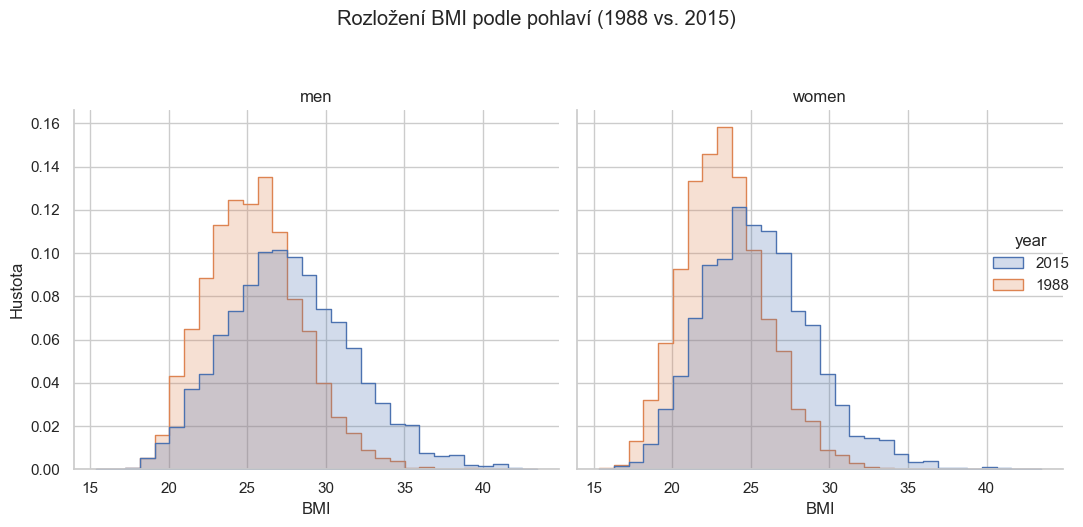

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram rozdělený podle pohlaví a roku
sns.set(style="whitegrid")

g = sns.displot(
    data=df_all, x="BMI", hue="year",
    col="sex", kind="hist", bins=30, element="step", stat="density",
    common_norm=False
)

g.set_titles("{col_name}")
g.set_axis_labels("BMI", "Hustota")
plt.suptitle("Rozložení BMI podle pohlaví (1988 vs. 2015)", y=1.05)
plt.tight_layout()
plt.show()


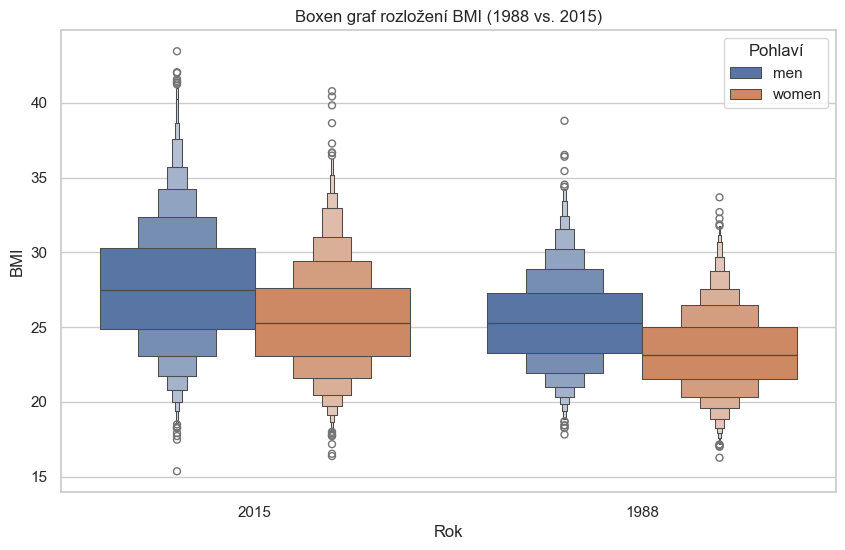

In [70]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_all, x="year", y="BMI", hue="sex")
plt.title("Boxen graf rozložení BMI (1988 vs. 2015)")
plt.xlabel("Rok")
plt.ylabel("BMI")
plt.legend(title="Pohlaví")
plt.show()


**Srovnání**
- Z grafů je patrné, že BMI v roce 2015 oproti roku 1988 je průměrně vyšší a i medián BMI má vyšší hodnotu. Toto lze interpretovato tak, že příslušníci jednotek v roce 2015 jsou průměrně hmotnější, než příslušníci se stejnou výškou v roce 1988.